In [1]:
import sys
import os
import pandas as pd

sys.path.insert(0,'/home/hyunny88/projects/auto-trading/')
os.chdir('/home/hyunny88/projects/auto-trading/')
os.path.abspath(os.curdir)

'/home/hyunny88/projects/auto-trading'

In [2]:
from autotrading.db.mongodb import mongodb_handler
mongodb = mongodb_handler.MongoDBHandler("remote", "coiner", "price_info")

result = mongodb.find_items({"coin":"etc_krw","year":2018,"month":1})

df = pd.DataFrame(list(result), columns=["timestamp", "coin", "amount", "year", "month", "day", "price","hour","minute","second"])
df['timestamp'] = df['timestamp'].astype(int)
df['amount'] = df['amount'].astype(float)
df['price'] = df['price'].astype(float)
df.groupby('day').mean()['price'].plot()

In [3]:
df = df.set_index(pd.DatetimeIndex(pd.to_datetime(df['timestamp'], unit='s')))#.tz_localize('UTC')).tz_convert('Asia/Seoul')

In [4]:
df = df.drop_duplicates(subset='day', keep='last')

In [5]:
df = df.set_index(pd.DatetimeIndex(df.index.date))

In [6]:
import matplotlib.pyplot as plt
from zipline.api import order, symbol, record
from zipline.algorithm import TradingAlgorithm

# data
#start = datetime.datetime(2018, 1, 1)
#end = datetime.datetime(2018, 1, 30)
data = df 
data = data.tz_localize("UTC")
data = data[['price']]


In [7]:
def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('price'), 1)

algo = TradingAlgorithm(initialize=initialize, handle_data=handle_data)
result = algo.run(data)

In [8]:
result[['starting_cash', 'ending_cash', 'ending_value']]

,starting_cash,ending_cash,ending_value
2018-01-02 21:00:00+00:00,100000.0,100000.0,0.0
2018-01-03 21:00:00+00:00,100000.0,57499.0,42500.0
2018-01-04 21:00:00+00:00,57499.0,9988.0,95020.0
2018-01-05 21:00:00+00:00,9988.0,-41103.0,153270.0
2018-01-08 21:00:00+00:00,-41103.0,-88304.0,188800.0
2018-01-09 21:00:00+00:00,-88304.0,-140555.0,261250.0
2018-01-10 21:00:00+00:00,-140555.0,-196936.0,338280.0
2018-01-11 21:00:00+00:00,-196936.0,-245337.0,338800.0
2018-01-12 21:00:00+00:00,-245337.0,-294818.0,395840.0
2018-01-16 21:00:00+00:00,-294818.0,-337829.0,387090.0


In [10]:
result.portfolio_value

2018-01-02 21:00:00+00:00    100000.0
2018-01-03 21:00:00+00:00     99999.0
2018-01-04 21:00:00+00:00    105008.0
2018-01-05 21:00:00+00:00    112167.0
2018-01-08 21:00:00+00:00    100496.0
2018-01-09 21:00:00+00:00    120695.0
2018-01-10 21:00:00+00:00    141344.0
2018-01-11 21:00:00+00:00     93463.0
2018-01-12 21:00:00+00:00    101022.0
2018-01-16 21:00:00+00:00     49261.0
2018-01-17 21:00:00+00:00    -76830.0
2018-01-18 21:00:00+00:00     31169.0
2018-01-19 21:00:00+00:00     48768.0
2018-01-22 21:00:00+00:00    -24313.0
2018-01-23 21:00:00+00:00    -41994.0
2018-01-24 21:00:00+00:00    -27715.0
2018-01-25 21:00:00+00:00    -50216.0
2018-01-26 21:00:00+00:00    -66217.0
2018-01-29 21:00:00+00:00     -9438.0
2018-01-30 21:00:00+00:00    -55879.0
2018-01-31 21:00:00+00:00   -117250.0
Name: portfolio_value, dtype: float64

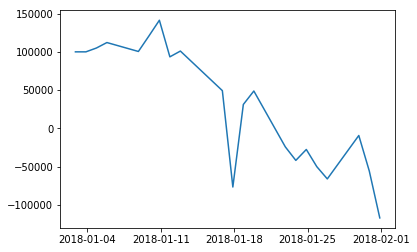

In [9]:
plt.plot(result.index, result.portfolio_value)
plt.show()